# Walmart shoplifters

Police reports about arrests pertaining the Walmart Supercenter on 279 Troy Road in Rensselaer, New York.

Source: [Muchrock](https://www.muckrock.com/foi/east-greenbush-23384/walmart-correspondence-and-records-38074/), PDF: [7-6-17_MR38074_RES.pdf](7-6-17_MR38074_RES.pdf)

## Step 1

Convert the PDF pages into PNGs in the command line using Imagemagick:

In [1]:
!convert -density 300 7-6-17_MR38074_RES.pdf output/output.png

## Step 2

Convert the PNGs into TXT files in the command line using Tesseract (and Kull):

In [2]:
import glob

In [3]:
pdfs = glob.glob('output/output-*.png')
pdfs.remove('output/output-0.png')
pdfs.remove('output/output-33.png')
pdfs.remove('output/output-70.png')

In [4]:
for pdf in pdfs:
    !cp uznfile.uzn output/uznfile.uzn
    !mv output/uznfile.uzn {pdf[:-4]}.uzn
    !tesseract {pdf} {pdf[:-4]} -c tessedit_char_blacklist=ﬁﬂ -psm 4
    !rm -f {pdf[:-4]}.uzn

Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract 

Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract Open Source OCR Engine v3.05.01 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Tesseract 

## Step 3

Import the TXT files into Python, use RegEx to clean up the mess and get all the ages. Put them into a list and eventually into a dataframe:

In [5]:
import re
import pandas as pd
%matplotlib inline

In [6]:
ages=[]

for pdf in pdfs:
    with open(pdf[:-4] + '.txt', 'r') as myfile:
        lines = myfile.read().splitlines()
    ages.append(re.search('(\d{1,3})\s?Y', lines[0]).group(1))

df = pd.DataFrame(ages, columns=['age'])
df['age'] = df['age'].astype('int')

df.head()

,age
0,36
1,33
2,53
3,53
4,16


# Step 4

Playing around: How are the shoplifters' ages distributed?

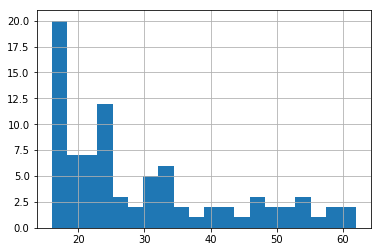

In [7]:
df['age'].hist(bins=20)